# Autoregression

In this notebook we will examine how to create a simple autoregressive model using sklearn.

In [1]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


First, let's create a timeseries dataset to test our model.

In [2]:
def create_timeseries(N, sines=6):
    x = np.linspace(0, 100, N);
    y = 0
    for i in range(sines):
        y+= np.sin(2*np.pi * (i/10)* x) + 0.1*np.random.randn(x.shape[0],)
    return x, y
    

In [3]:
x, y = create_timeseries(200)

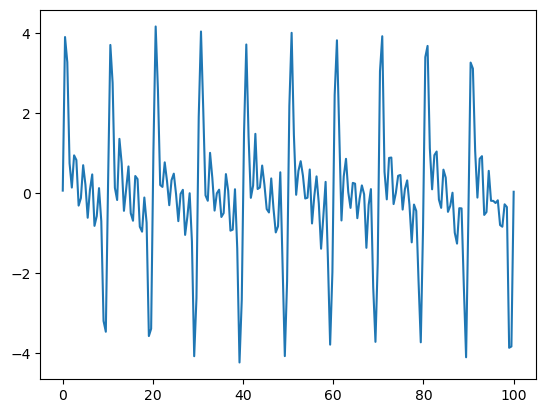

In [4]:
plt.plot(x,y)
plt.show()

Next, we need to preprocess the dataset in order to create the feature vectors with the previous values, as expected by sklearn's LinearRegression.

In [5]:
def create_dataset(y, order):
    x_data = []
    y_data = []
    for i in range(len(y)-order):
        x_data.append(y[i:i+order])
        y_data.append(y[i+order])
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)
    return x_data, y_data

# Split into train and test
x_train, y_train = create_dataset(y[:100], 5)
x_test, y_test = create_dataset(y[100:], 5)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(95, 5) (95,)
(95, 5) (95,)


Now, we are ready to fit our model!

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

Evaluate on the train set

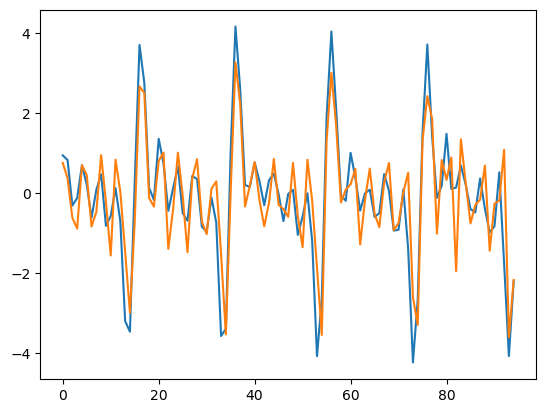

In [8]:
plt.plot(y_train)
plt.plot(y_pred_train)

In [9]:
print("MSE = ", np.mean((y_train-y_pred_train)**2))

MSE =  0.6452891482520933


Evalute on the test set

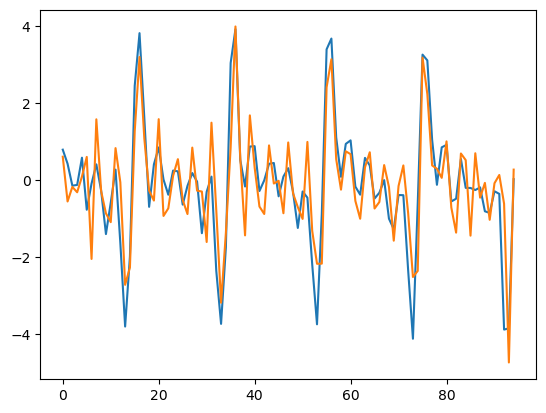

In [10]:
plt.plot(y_test)
plt.plot(y_pred_test)

In [11]:
print("MSE = ", np.mean((y_test-y_pred_test)**2))

MSE =  0.7883442045209405
